In [167]:
import numpy as np 
import pandas as pd 
import seaborn as sn 
from scipy import stats 
import matplotlib.pyplot as plt 

sn.set() 
plt.style.use('dark_background')

theta,random,radon,radom
p,0.000076,0.000006,3.120000e-07


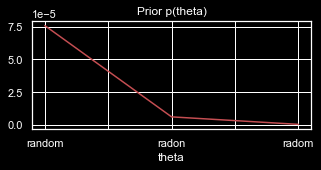

In [485]:
# BDA3 example p.10

# Spell-checker gives: p(theta='random'|'radom')
theta = 'random radon radom'.split(' ')  # possible mispellings
words = theta[:]  # word entered 

# Create a 1x3 prior 
prior = pd.DataFrame(
    {'theta': theta,
     'p': [7.60 * 1e-5,   # 'random' 
           6.05 * 1e-6,   # 'radon'
           3.12 * 1e-7]}) # 'radom'
prior = prior.set_index('theta')

ax = plt.subplots(1,1,figsize=(5,2))[1]
ax = prior.p.plot(ax=ax, rot=0, c='r') 
ax.set_title('Prior p(theta)')
prior.T

In [495]:
x = [0.00193,    # p(words|theta=random) 
     0.000143,   # p(theta|theta=radon)
     0.975]
np.dstack(1 - np.array(x)).T[:, 0]


array([[0.99807 ],
       [0.999857],
       [0.025   ]])

Likelihood from BDA3 p(radom|theta)
 [1.93e-03 1.43e-04 9.75e-01]


p          
words     random     radom
theta                     
random  0.998070  0.001930
radon   0.999857  0.000143
radom   0.025000  0.975000

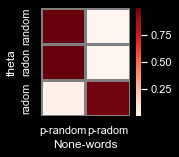

In [568]:
# Construct joint distribution p('radon', theta)
# rows=words, cols=theta
joint_mtx = np.array(
    # random    radom  
    [[0.99807,  0.00193],     # p(words=all|theta=random) 
     [0.999857, 0.000143],    # p(words=all|theta=radon)
     [0.025,    0.975]])      # p(words=all|theta=radom)

# Marginal along col-sum == 1 (p)
assert np.allclose(joint_mtx.sum(axis=1), np.ones(3), atol=1e-5)
# Marginal along row-sum != 1 (not p)
assert not np.allclose(joint_mtx.sum(axis=0), np.ones(2), atol=1e-5)

joint = pd.DataFrame(
    {'words': 'random radom random radom random radom'.split(' '), 
     'theta': 'random random radon radon radom radom'.split(' '),
     'p': np.ravel(joint_mtx)})

bda3_likel = joint[joint.words == 'radom'].p.values
assert np.allclose(bda3_likel, [0.00193, 0.000143, 0.975], atol=1e-10)

# Sort here is very annoying. Use numbers next time?
joint_ = (joint
          .groupby(['theta', 'words'])  # group -> x, y
          .agg(lambda x: x)
          .unstack()
          .sort_index(ascending=False, axis=0)
          .sort_index(ascending=False, axis=1))

ax = plt.subplots(1,1, figsize=(2,2))[1]
sn.heatmap(data=joint_, linecolor='grey', 
           linewidth=3, ax=ax, cmap='Reds');

print('Likelihood from BDA3 p(radom|theta)\n',        
      joint_.loc[:, [('p', 'radom')]].values.flatten())  # 
joint_

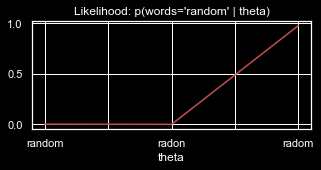

In [572]:
# Likelihood: p(words='random' | theta)
likel = joint_.p.loc[:, 'radom']  # p(words=radom|theta)
likel = pd.DataFrame(data=likel.values, columns=['p'], index=prior.index)
ax = plt.subplots(1,1, figsize=(5,2))[1]
likel.p.plot(c='r', ax=ax);
ax.set_title("Likelihood: p(words='random' | theta)");

theta,random,radon,radom
prior,0.000076,0.000006,3.120000e-07
likel,0.001930,0.000143,9.750000e-01
poste,0.324696,0.001915,6.733885e-01
bda3,0.325000,0.002000,6.730000e-01


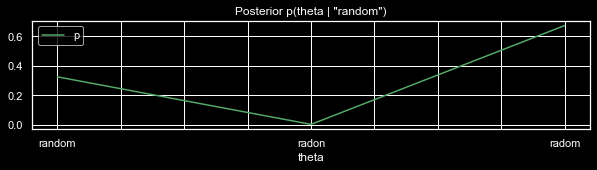

In [592]:
# Posterior: p(theta | words='random')
poste = prior.p.values * likel.p.values
poste = pd.DataFrame(poste / np.sum(poste), 
                     columns=['p'], index=prior.index)
ax = plt.subplots(1,1, figsize=(10, 2))[1]
ax = poste.plot(c='g', ax=ax)
ax.set_title('Posterior p(theta | "random")')

df = pd.DataFrame(
    {'prior': prior.p.values,
     'likel': likel.p.values,
     'poste': poste.p.values, 
     'bda3': [0.325, 0.002, 0.673]},
    index = prior.index).T 
     
df

